In [2]:
import base_acquire as base

from pprint import pprint
import pandas as pd
import nltk
import re

In [3]:
# read json file named data
data = pd.read_json("data.json")
data


,repo,language,readme_contents
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img..."
...,...,...,...
119,microsoft/winget-cli,C++,# Windows Package Manager Client \n\nThis repo...
120,IntelLabs/control-flag,C++,**A friendly request: Thanks for visiting cont...
121,onnx/onnx,C++,<!--- SPDX-License-Identifier: Apache-2.0 -->\...
122,catchorg/Catch2,C++,"<a id=""top""></a>\n![Catch2 logo](data/artwork/..."


In [4]:
# only use unique repos
data = data.drop_duplicates(subset="repo")
data

,repo,language,readme_contents
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img..."
...,...,...,...
119,microsoft/winget-cli,C++,# Windows Package Manager Client \n\nThis repo...
120,IntelLabs/control-flag,C++,**A friendly request: Thanks for visiting cont...
121,onnx/onnx,C++,<!--- SPDX-License-Identifier: Apache-2.0 -->\...
122,catchorg/Catch2,C++,"<a id=""top""></a>\n![Catch2 logo](data/artwork/..."


In [5]:
def clean(text: str) -> list:
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = set(nltk.corpus.stopwords.words('english'))
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

data['clean_text'] = data.readme_contents.apply(clean).apply(' '.join)

In [6]:
data

,repo,language,readme_contents,clean_text
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...,ccxt cryptocurrency exchange trading library b...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...,engine deprecation note engine api introduced ...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...,zeronet build statushttpstravisciorghellozeron...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...,freqtradehttpsrawgithubusercontentcomfreqtrade...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img...",p idreadmea hrefhttpsgunecoimg width40 srchttp...
...,...,...,...,...
119,microsoft/winget-cli,C++,# Windows Package Manager Client \n\nThis repo...,window package manager client repository conta...
120,IntelLabs/control-flag,C++,**A friendly request: Thanks for visiting cont...,friendly request thanks visiting controlflag g...
121,onnx/onnx,C++,<!--- SPDX-License-Identifier: Apache-2.0 -->\...,spdxlicenseidentifier apache20 p aligncenterim...
122,catchorg/Catch2,C++,"<a id=""top""></a>\n![Catch2 logo](data/artwork/...",idtopa catch2 logodataartworkcatch2logosmallpn...


In [7]:
# view nulls
data.isnull().sum()

repo               0
language           0
readme_contents    0
clean_text         0
dtype: int64

Are there any words that uniquely identify a programming language?

In [8]:
# rename columns
data.rename(columns={'repo': 'repo_name', 'readme_contents': 'text', 'language': 'programming_lang'}, inplace=True)

In [9]:
data

,repo_name,programming_lang,text,clean_text
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...,ccxt cryptocurrency exchange trading library b...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...,engine deprecation note engine api introduced ...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...,zeronet build statushttpstravisciorghellozeron...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...,freqtradehttpsrawgithubusercontentcomfreqtrade...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img...",p idreadmea hrefhttpsgunecoimg width40 srchttp...
...,...,...,...,...
119,microsoft/winget-cli,C++,# Windows Package Manager Client \n\nThis repo...,window package manager client repository conta...
120,IntelLabs/control-flag,C++,**A friendly request: Thanks for visiting cont...,friendly request thanks visiting controlflag g...
121,onnx/onnx,C++,<!--- SPDX-License-Identifier: Apache-2.0 -->\...,spdxlicenseidentifier apache20 p aligncenterim...
122,catchorg/Catch2,C++,"<a id=""top""></a>\n![Catch2 logo](data/artwork/...",idtopa catch2 logodataartworkcatch2logosmallpn...


In [10]:
# Let's first take a look at how many of the texts are in what programming language.
data.programming_lang.value_counts()

JavaScript          24
Python              20
HTML                17
C++                 16
Jupyter Notebook    11
Java                 6
C                    5
Ruby                 3
TeX                  2
Shell                2
TypeScript           2
Go                   2
C#                   2
Assembly             1
Mathematica          1
CSS                  1
Swift                1
Kotlin               1
G-code               1
R                    1
PHP                  1
MATLAB               1
Matlab               1
Groff                1
Objective-C          1
Name: programming_lang, dtype: int64

In [11]:
# create new dataframe with the bottom 19 programming languages
data_19 = data[data.programming_lang.isin(data.programming_lang.value_counts().index[:19].tolist())]
data_19

,repo_name,programming_lang,text,clean_text
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...,ccxt cryptocurrency exchange trading library b...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...,engine deprecation note engine api introduced ...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...,zeronet build statushttpstravisciorghellozeron...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...,freqtradehttpsrawgithubusercontentcomfreqtrade...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img...",p idreadmea hrefhttpsgunecoimg width40 srchttp...
...,...,...,...,...
119,microsoft/winget-cli,C++,# Windows Package Manager Client \n\nThis repo...,window package manager client repository conta...
120,IntelLabs/control-flag,C++,**A friendly request: Thanks for visiting cont...,friendly request thanks visiting controlflag g...
121,onnx/onnx,C++,<!--- SPDX-License-Identifier: Apache-2.0 -->\...,spdxlicenseidentifier apache20 p aligncenterim...
122,catchorg/Catch2,C++,"<a id=""top""></a>\n![Catch2 logo](data/artwork/...",idtopa catch2 logodataartworkcatch2logosmallpn...


In [12]:
labels = pd.concat([data.programming_lang.value_counts(),
                    data.programming_lang.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
JavaScript,24,0.193548
Python,20,0.161290
HTML,17,0.137097
C++,16,0.129032
Jupyter Notebook,11,0.088710
Java,6,0.048387
C,5,0.040323
Ruby,3,0.024194
TeX,2,0.016129
Shell,2,0.016129


Let's break the data up into seperate pieces:

- The words that appear in Javascript.

- The words that appear in Python.

- Words that appear in Jupyter Notebooks.

- Words that appear in C++.

- Words that appear in HTML.

- All other words.


In [13]:
import unicodedata

ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') # + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [14]:
javascript_words = clean(' '.join(data[data.programming_lang == 'JavaScript'].clean_text))
python_words = clean(' '.join(data[data.programming_lang == 'Python'].clean_text))
jupyter_words = clean(' '.join(data[data.programming_lang == 'Jupyter Notebook'].clean_text))
# java_words = clean(' '.join(data[data.programming_lang == 'Java'].clean_text))
# c_words = clean(' '.join(data[data.programming_lang == 'C'].clean_text))
c_plus_words = clean(' '.join(data[data.programming_lang == 'C++'].clean_text))
html_words = clean(' '.join(data[data.programming_lang == 'HTML'].clean_text))

# rudy_words = clean(' '.join(data[data.programming_lang == 'Rudy'].clean_text))
# go_words = clean(' '.join(data[data.programming_lang == 'Go'].clean_text))
# type_words = clean(' '.join(data[data.programming_lang == 'TypeScript'].clean_text))
# tex_words = clean(' '.join(data[data.programming_lang == 'TeX'].clean_text))
# shell_words = clean(' '.join(data[data.programming_lang == 'Shell'].clean_text))

all_words = clean(' '.join(data.clean_text))
# other_words = clean(' '.join(data[data.programming_lang != 'JavaScript', 'Python', 'Jupyter Notebook', 'Java', 'C', 'C++', 'HTML'].clean_text))

In [15]:
javascript_freq = pd.Series(javascript_words).value_counts()
python_freq = pd.Series(python_words).value_counts()
jupyter_freq = pd.Series(jupyter_words).value_counts()
# java_freq = pd.Series(java_words).value_counts()
# c_freq = pd.Series(c_words).value_counts()
c_plus_freq = pd.Series(c_plus_words).value_counts()
html_freq = pd.Series(html_words).value_counts()


# rudy_freq = pd.Series(rudy_words).value_counts()
# go_freq = pd.Series(go_words).value_counts()
# type_freq = pd.Series(type_words).value_counts()
# tex_freq = pd.Series(tex_words).value_counts()
# shell_freq = pd.Series(shell_words).value_counts()

all_freq = pd.Series(all_words).value_counts()
# other_freq = pd.Series(other_words).value_counts()

In [16]:
word_counts = (pd.concat([all_freq, javascript_freq, python_freq, jupyter_freq, c_plus_freq, html_freq], axis=1, sort=True)
                .set_axis(['all', 'javascript', 'python', 'jupyter', 'C_plus', 'html'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts

,all,javascript,python,jupyter,C_plus,html
0,46,7,5,1,8,0
00,2,1,0,0,0,0
0000,3,1,0,0,1,1
000030,3,0,0,3,0,0
000200,1,0,0,1,0,0
...,...,...,...,...,...,...
zubhub_backend,1,1,0,0,0,0
zubhubzubhub_frontendzubhub,1,1,0,0,0,0
zurich,3,0,0,0,0,0
zverovich,1,0,0,0,1,0


In [17]:
word_counts.sort_values(by='all', ascending=False).head(10)


,all,javascript,python,jupyter,C_plus,html
data,563,69,56,33,31,219
version,404,177,18,4,43,24
use,377,87,56,12,52,23
run,326,100,32,11,41,23
code,317,56,34,14,70,40
build,298,58,10,0,87,5
project,295,56,63,15,34,53
using,281,78,33,14,26,24
file,280,54,20,11,39,39
api,269,173,19,0,4,14


In [18]:
pd.concat([word_counts[word_counts.javascript == 0].sort_values(by='javascript').tail(6),
           word_counts[word_counts.python == 0].sort_values(by='python').tail(6),
           word_counts[word_counts.jupyter == 0].sort_values(by='jupyter').tail(6),
           word_counts[word_counts.C_plus == 0].sort_values(by='C_plus').tail(6),
           word_counts[word_counts.html == 0].sort_values(by='html').tail(6)])

,all,javascript,python,jupyter,C_plus,html
family_tree,1,0,0,0,0,0
famous,1,0,0,1,0,0
fancyzones,2,0,0,0,0,0
fancyzoneshttpsakamspowertoysoverview_fancyzones,1,0,0,0,0,0
facilityhttparchiveesoorgcmshtml,1,0,0,0,0,0
zxf,1,0,0,0,1,0
extensionshttpreactivexio,1,0,0,0,0,0
extensionslike,1,0,0,0,1,0
extensionspushapplyextensions,1,1,0,0,0,0
extensively,3,0,0,0,1,0


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
plt.rc('figure', figsize=(11, 5))
plt.style.use('fivethirtyeight')
plt.rc('font', size=16)

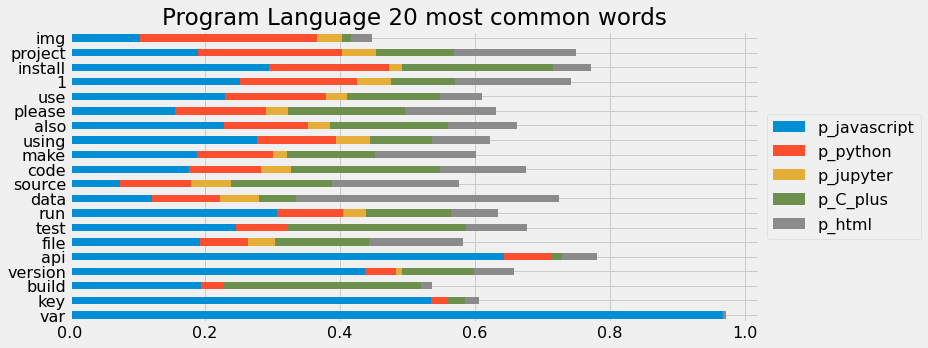

In [54]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_javascript=word_counts.javascript / word_counts['all'],
         p_python=word_counts.python / word_counts['all'],
         p_jupyter=word_counts.jupyter / word_counts['all'],
        #  p_java=word_counts.java / word_counts['all'],
        #  p_C=word_counts.C / word_counts['all'],
         p_C_plus=word_counts.C_plus / word_counts['all'],
         p_html=word_counts.html / word_counts['all'],
        #  p_rudy=word_counts.rudy / word_counts['all'],
        #  p_go=word_counts.go / word_counts['all'],
        #  p_type=word_counts.type / word_counts['all'],
        #  p_tex=word_counts.tex / word_counts['all'],
        #  p_shell=word_counts.shell / word_counts['all'])
 )

 
 .sort_values(by='all')
 [['p_javascript', 'p_python', 'p_jupyter', 'p_C_plus', 'p_html']]
 .tail(20)
 .sort_values('p_python')
 .plot.barh(stacked=True))


plt.title('Program Language 20 most common words')
# move legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# save the plot
plt.savefig('programming_language_20_most_common_words.png')

In [21]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,javascript,python,jupyter,C_plus,html
data,563,69,56,33,31,219
version,404,177,18,4,43,24
use,377,87,56,12,52,23
run,326,100,32,11,41,23
code,317,56,34,14,70,40
build,298,58,10,0,87,5
project,295,56,63,15,34,53
using,281,78,33,14,26,24
file,280,54,20,11,39,39
api,269,173,19,0,4,14


In [22]:
# Make Bigrams for javascript

# select all rows with javascript as programming language
data_js = data[data.programming_lang == 'JavaScript']


In [23]:
#remove index from data_js
data_js.reset_index(drop=True, inplace=True)

In [24]:
data_js_string = str(data_js.clean_text)

In [25]:
bigrams = nltk.ngrams(data_js_string.split(), 2)
list(bigrams)

[('0', 'ccxt'),
 ('ccxt', 'cryptocurrency'),
 ('cryptocurrency', 'exchange'),
 ('exchange', 'trading'),
 ('trading', 'library'),
 ('library', 'b...'),
 ('b...', '1'),
 ('1', 'zeronet'),
 ('zeronet', 'build'),
 ('build', 'statushttpstravisciorghellozeron...'),
 ('statushttpstravisciorghellozeron...', '2'),
 ('2', 'p'),
 ('p', 'idreadmea'),
 ('idreadmea', 'hrefhttpsgunecoimg'),
 ('hrefhttpsgunecoimg', 'width40'),
 ('width40', 'srchttp...'),
 ('srchttp...', '3'),
 ('3', 'cryptojs'),
 ('cryptojs', 'javascript'),
 ('javascript', 'library'),
 ('library', 'crypto'),
 ('crypto', 'standard'),
 ('standard', 'no...'),
 ('no...', '4'),
 ('4', 'sjcl'),
 ('sjcl', 'build'),
 ('build', 'statushttpstravisciorgbitwiseshiftl...'),
 ('statushttpstravisciorgbitwiseshiftl...', '5'),
 ('5', 'forge'),
 ('forge', 'npm'),
 ('npm', 'packagehttpsnodeiconpmnodeforgepngdo...'),
 ('packagehttpsnodeiconpmnodeforgepngdo...', '6'),
 ('6', 'endtoend'),
 ('endtoend', 'travis'),
 ('travis', 'buildhttpstravisciorggoogleend

In [26]:
top_20_ham_bigrams = (pd.Series(nltk.ngrams(javascript_words, 2))
                      .value_counts()
                      .head(20))

In [27]:
top_20_ham_bigrams.head()

(api, version)                                                                                         131
(ccxt, prohttpsimgshieldsiobadgeccxtproblackhttpsccxtpro)                                               54
(ccxt, certifiedhttpsimgshieldsiobadgeccxtcertifiedgreensvghttpsgithubcomccxtccxtwikicertification)     30
(__examples__, j)                                                                                       28
(certifiedhttpsimgshieldsiobadgeccxtcertifiedgreensvghttpsgithubcomccxtccxtwikicertification, ccxt)     28
dtype: int64

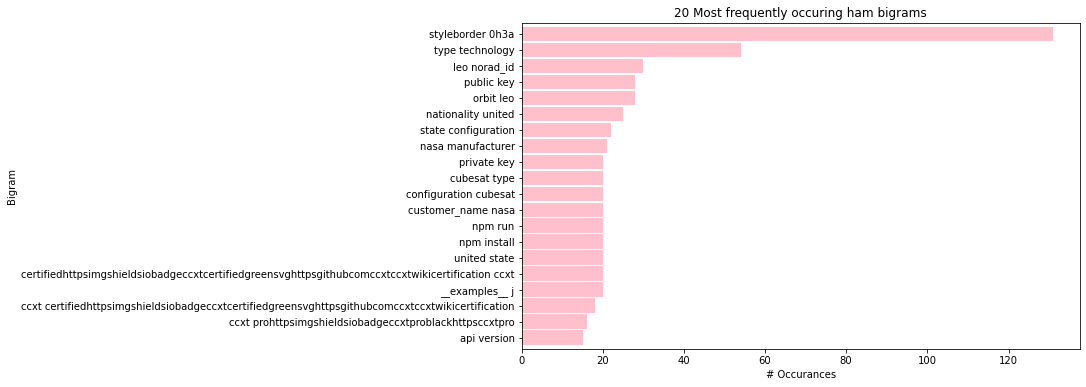

In [28]:
top_20_ham_bigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [29]:
def bigram_tool(lang, lang_words):
    top_20_ham_bigrams = (pd.Series(nltk.ngrams(lang_words, 2))
                      .value_counts()
                      .head(20))
    top_20_ham_bigrams.sort_values().plot.barh(color= 'red' , width=.9, figsize=(10, 6))


    plt.rc('figure', figsize=(11, 5))
    plt.style.use('fivethirtyeight')
    plt.rc('font', size=16)

    plt.title('20 Most frequently occuring ' + lang + ' bigrams')
    plt.ylabel('Bigram')
    plt.xlabel('# Occurances')

    # make the labels pretty
    ticks, _ = plt.yticks()
    labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
    _ = plt.yticks(ticks, labels)
    
    return top_20_ham_bigrams

,count
"(package, manager)",16
"(window, package)",15
"(git, clone)",14
"(pull, request)",13
"(source, code)",12
"(flight, software)",11
"(code, c)",10
"(open, source)",10
"(guest, science)",10
"(solar, system)",9


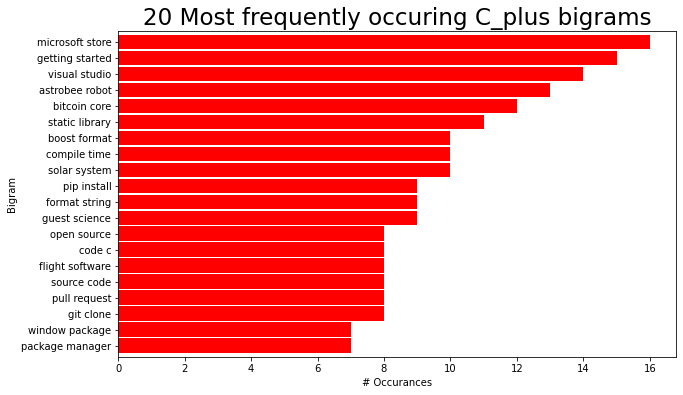

In [30]:


# what to run in function: 'all', all_words ; 'javascript', javascript_words ; 'python', python_words ; 'jupyter', jupyter_words ;	'C_plus', c_plus_words ; 'html', html_words

bigram = bigram_tool('C_plus', c_plus_words)
bigram = pd.DataFrame(bigram)
bigram.columns = ['count']
bigram.sort_values(by='count', ascending=False).head(20)

,count
"(api, version)",131
"(ccxt, prohttpsimgshieldsiobadgeccxtproblackhttpsccxtpro)",54
"(ccxt, certifiedhttpsimgshieldsiobadgeccxtcertifiedgreensvghttpsgithubcomccxtccxtwikicertification)",30
"(__examples__, j)",28
"(certifiedhttpsimgshieldsiobadgeccxtcertifiedgreensvghttpsgithubcomccxtccxtwikicertification, ccxt)",28
"(united, state)",25
"(npm, install)",22
"(npm, run)",21
"(state, configuration)",20
"(public, key)",20


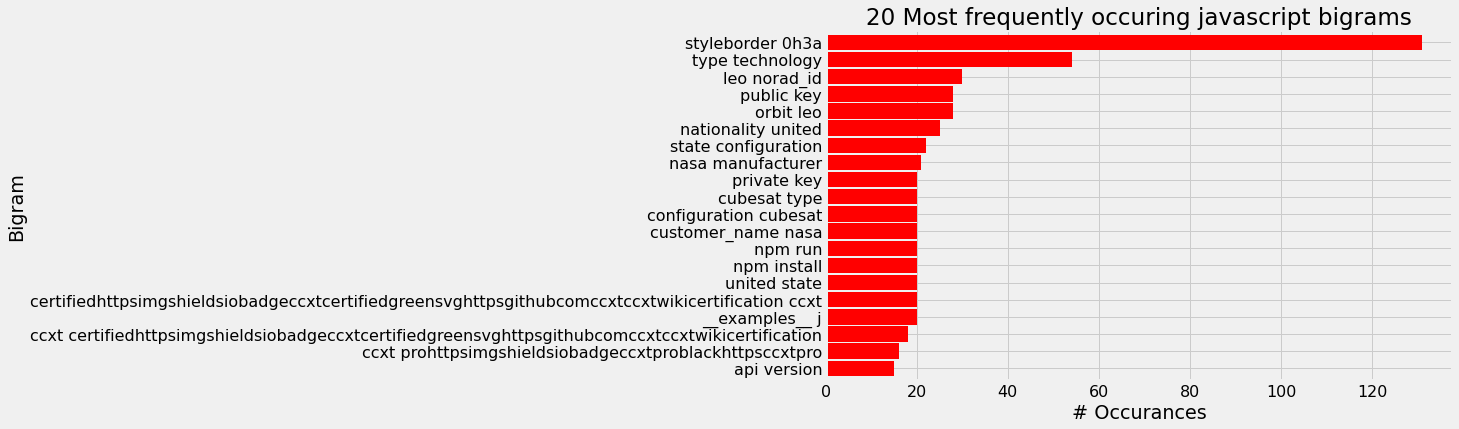

In [31]:

bigram = bigram_tool('javascript', javascript_words)
bigram = pd.DataFrame(bigram)
bigram.columns = ['count']
bigram.sort_values(by='count', ascending=False).head(20)

New questions:

What words can we use to identify the readme program language as Javascript and python.

In [32]:
# # add to repos HTML
# "web-sys1/ActionData",
# "rvaughan/coronavirus-data",
# "weareblahs/covidcases",
# "covid19-eu-zh/covid19-eu-data",
# "ercbk/Indiana-COVIDcast-Dashboard",
# "ercbk/Indiana-COVID-19-Website",
# "RamiKrispin/coronavirus",
# "covidatlas/coronadatascraper",
# "minvws/nl-covid19-notification-app-website",
# "BustByte/coronastatus",
# "tomwhite/covid-19-uk-data",
# "vinitshahdeo/Water-Monitoring-System",
# "labnol/covid19-vaccine-tracker"
## adding C++
# "google/googletest",
# "apache/incubator-doris",
# "fmtlib/fmt",
# "opencv/opencv",
# "microsoft/calculator",
# "microsoft/winget-cli",
# "IntelLabs/control-flag",
# "onnx/onnx",
# "catchorg/Catch2",
# "facebook/folly"

In [33]:
# how many nulls in the data?
data.isnull().sum()

repo_name           0
programming_lang    0
text                0
clean_text          0
dtype: int64

In [34]:
word_counts

,all,javascript,python,jupyter,C_plus,html
0,46,7,5,1,8,0
00,2,1,0,0,0,0
0000,3,1,0,0,1,1
000030,3,0,0,3,0,0
000200,1,0,0,1,0,0
...,...,...,...,...,...,...
zubhub_backend,1,1,0,0,0,0
zubhubzubhub_frontendzubhub,1,1,0,0,0,0
zurich,3,0,0,0,0,0
zverovich,1,0,0,0,1,0


In [35]:
# select onlt the rows with the programming language javascript, python, jupyter, c++, and html
data_js = data[data.programming_lang == 'JavaScript']
data_py = data[data.programming_lang == 'Python']
data_jy = data[data.programming_lang == 'Jupyter Notebook']
data_c_plus = data[data.programming_lang == 'C++']
data_html = data[data.programming_lang == 'HTML']
# combine the data frames
new_data = pd.concat([data_js, data_py, data_jy, data_c_plus, data_html])
new_data

,repo_name,programming_lang,text,clean_text
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...,ccxt cryptocurrency exchange trading library b...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...,zeronet build statushttpstravisciorghellozeron...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img...",p idreadmea hrefhttpsgunecoimg width40 srchttp...
5,brix/crypto-js,JavaScript,# crypto-js\n\nJavaScript library of crypto st...,cryptojs javascript library crypto standard no...
10,bitwiseshiftleft/sjcl,JavaScript,sjcl\n====\n\n[![Build Status](https://travis-...,sjcl build statushttpstravisciorgbitwiseshiftl...
...,...,...,...,...
109,minvws/nl-covid19-notification-app-website,HTML,Content & Translations\n---------------------\...,content translation add question add feature c...
110,BustByte/coronastatus,HTML,# Coronastatus (archived)\n\n![](https://githu...,coronastatus archived httpsgithubcombustbyteco...
111,tomwhite/covid-19-uk-data,HTML,# COVID-19 UK Historical Data\n\n:warning: **U...,covid19 uk historical data warning update 1 au...
112,vinitshahdeo/Water-Monitoring-System,HTML,# [Water Monitoring System](https://vinitshahd...,water monitoring systemhttpsvinitshahdeogithub...


In [36]:
new_data['clean_text']

# convert the text into attribute to split
a = new_data['clean_text'][0]

In [37]:
# convert a into string
a = str(a)

a = str(new_data['clean_text'])

In [38]:
# # # get data ready to model
# # document = 'Mary had a little lamb, a little lamb, a little lamb.'

# # # clean up the text
# # document = document.lower().replace(',', '').replace('.', '')
# # transform into a series
# words = pd.Series(a.split())

# # From the Series we can extract the value_counts, which is our raw count
# # for term frequency. Once we have the raw counts, we can calculate the
# # other measures.
# (pd.DataFrame({'raw_count': words.value_counts()})
#  .assign(frequency=lambda df: df.raw_count / df.raw_count.sum())
#  .assign(augmented_frequency=lambda df: df.frequency / df.frequency.max()))

In [39]:
# select only programming language and clean text columns
new_data = data[['programming_lang', 'clean_text']]

In [40]:
new_data

,programming_lang,clean_text
0,JavaScript,ccxt cryptocurrency exchange trading library b...
1,C,engine deprecation note engine api introduced ...
2,JavaScript,zeronet build statushttpstravisciorghellozeron...
3,Python,freqtradehttpsrawgithubusercontentcomfreqtrade...
4,JavaScript,p idreadmea hrefhttpsgunecoimg width40 srchttp...
...,...,...
119,C++,window package manager client repository conta...
120,C++,friendly request thanks visiting controlflag g...
121,C++,spdxlicenseidentifier apache20 p aligncenterim...
122,C++,idtopa catch2 logodataartworkcatch2logosmallpn...


In [41]:
# create a label column where javascript is 1 and python is 2 everything else is 0
data['label'] = data['programming_lang'].map({'JavaScript': 'javascript', 'Python': 'python', 'Jupyter Notebook': 'jupyter', 'C++': 'c_plus', 'HTML': 'html'})
# in the label column, replace the null values with 'other'
data['label'].fillna('other', inplace=True)

In [42]:
data

,repo_name,programming_lang,text,clean_text,label
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...,ccxt cryptocurrency exchange trading library b...,javascript
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...,engine deprecation note engine api introduced ...,other
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...,zeronet build statushttpstravisciorghellozeron...,javascript
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...,freqtradehttpsrawgithubusercontentcomfreqtrade...,python
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img...",p idreadmea hrefhttpsgunecoimg width40 srchttp...,javascript
...,...,...,...,...,...
119,microsoft/winget-cli,C++,# Windows Package Manager Client \n\nThis repo...,window package manager client repository conta...,c_plus
120,IntelLabs/control-flag,C++,**A friendly request: Thanks for visiting cont...,friendly request thanks visiting controlflag g...,c_plus
121,onnx/onnx,C++,<!--- SPDX-License-Identifier: Apache-2.0 -->\...,spdxlicenseidentifier apache20 p aligncenterim...,c_plus
122,catchorg/Catch2,C++,"<a id=""top""></a>\n![Catch2 logo](data/artwork/...",idtopa catch2 logodataartworkcatch2logosmallpn...,c_plus


In [43]:
# import train_test_split
from sklearn.model_selection import train_test_split

# split the data into training and testing sets on programming language
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])
train_data

,repo_name,programming_lang,text,clean_text,label
86,shama/letswritecode,JavaScript,# Let's Write Code\n\nAll the code examples fo...,let write code code example youtube series let...,javascript
28,NASAWorldWind/WorldWindJava,Java,"<img src=""https://worldwind.arc.nasa.gov/img/n...",img srchttpsworldwindarcnasagovimgnasalogosvg ...,other
62,INCF/neuroshapes,Python,[![Join the chat at https://gitter.im/INCF/neu...,join chat httpsgitterimincfneuroshapeshttpsbad...,python
21,trustwallet/assets,Go,# Trust Wallet Assets Info\n\n![Check](https:/...,trust wallet asset info checkhttpsgithubcomtru...,other
18,PrivateBin/PrivateBin,PHP,# [![PrivateBin](https://cdn.rawgit.com/Privat...,privatebinhttpscdnrawgitcomprivatebinassetsmas...,other
...,...,...,...,...,...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img...",p idreadmea hrefhttpsgunecoimg width40 srchttp...,javascript
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...,zeronet build statushttpstravisciorghellozeron...,javascript
88,CTFd/CTFd,Python,# ![](https://github.com/CTFd/CTFd/blob/master...,httpsgithubcomctfdctfdblobmasterctfdthemescore...,python
80,AgoraIO-Usecase/eEducation,Objective-C,# This repository has been deprecated and arch...,repository deprecated archived potential upgra...,other


In [44]:
# explore javascript data 
train_data_js = train_data[train_data.programming_lang == 'JavaScript']
train_data_js

,repo_name,programming_lang,text,clean_text,label
86,shama/letswritecode,JavaScript,# Let's Write Code\n\nAll the code examples fo...,let write code code example youtube series let...,javascript
76,hyperledger-archives/education-cryptomoji,JavaScript,# Hyperledger Cryptomoji\n\nThis educational c...,hyperledger cryptomoji educational curriculum ...,javascript
90,Akshima-Ghai/OneEducationalWebsiteForAll,JavaScript,"# OneEducationalWebsiteForAll\n\n<div align=""c...",oneeducationalwebsiteforall div aligncenter br...,javascript
97,arschles/go-in-5-minutes,JavaScript,# Go In 5 Minutes\n\n[![Build Status](https://...,go 5 minute build statushttpstravisciorgarschl...,javascript
17,google/end-to-end,JavaScript,End-To-End\n==========\n\n![Travis Build](http...,endtoend travis buildhttpstravisciorggoogleend...,javascript
14,digitalbazaar/forge,JavaScript,# Forge\n\n[![npm package](https://nodei.co/np...,forge npm packagehttpsnodeiconpmnodeforgepngdo...,javascript
25,NASAWorldWind/WebWorldWind,JavaScript,"<img src=""https://worldwind.arc.nasa.gov/img/n...",img srchttpsworldwindarcnasagovimgnasalogosvg ...,javascript
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...,ccxt cryptocurrency exchange trading library b...,javascript
35,nasa/Open-Source-Catalog,JavaScript,# Open-Source-Catalog\n\n[![Build Status](http...,opensourcecatalog build statushttpstravisciorg...,javascript
24,Haehnchen/crypto-trading-bot,JavaScript,# Crypto Trading Bot\n\n[![Build Status](https...,crypto trading bot build statushttpstraviscior...,javascript


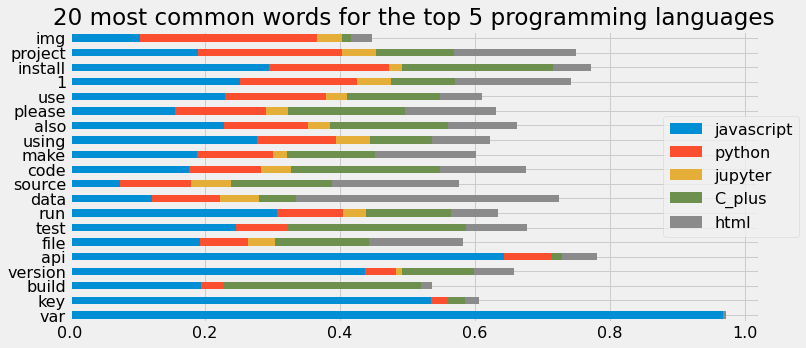

In [68]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(javascript=word_counts.javascript / word_counts['all'],
         python=word_counts.python / word_counts['all'],
         jupyter=word_counts.jupyter / word_counts['all'],
        #  p_java=word_counts.java / word_counts['all'],
        #  p_C=word_counts.C / word_counts['all'],
         C_plus=word_counts.C_plus / word_counts['all'],
         html=word_counts.html / word_counts['all'],
        #  p_rudy=word_counts.rudy / word_counts['all'],
        #  p_go=word_counts.go / word_counts['all'],
        #  p_type=word_counts.type / word_counts['all'],
        #  p_tex=word_counts.tex / word_counts['all'],
        #  p_shell=word_counts.shell / word_counts['all'])
 )

 
 .sort_values(by='all')
 [['javascript', 'python', 'jupyter', 'C_plus', 'html']]
 .tail(20)
 .sort_values('python')
 .plot.barh(stacked=True))


plt.title('20 most common words for the top 5 programming languages')
# move legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(.85, 0.5))
# save the plot
plt.savefig('programming_language_20_most_common_words.png')

,count
"(api, version)",131
"(open, source)",88
"(target_blankrua, img)",87
"(ccxt, prohttpsimgshieldsiobadgeccxtproblackhttpsccxtpro)",54
"(git, clone)",47
"(npm, run)",45
"(pull, request)",40
"(source, code)",40
"(pip, install)",34
"(united, state)",34


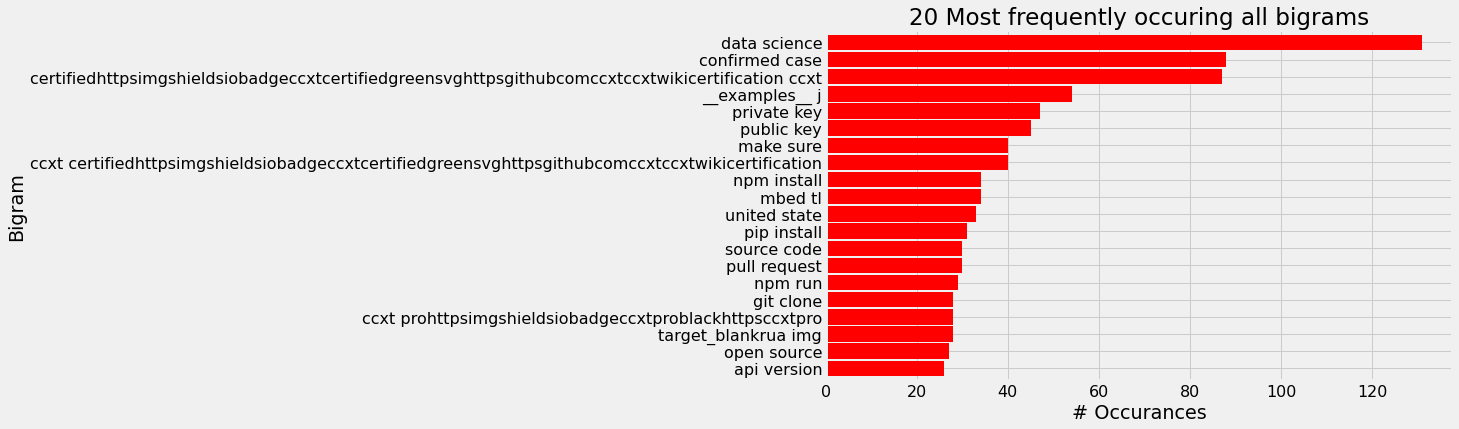

In [239]:
# what to run in function: 'all', all_words ; 'javascript', javascript_words ; 'python', python_words ; 'jupyter', jupyter_words ;	'C_plus', c_plus_words ; 'html', html_words

bigram = bigram_tool('all', all_words ) # copy code from above and change the programming language
bigram = pd.DataFrame(bigram)
bigram.columns = ['count']
bigram.sort_values(by='count', ascending=False).head(20)

In [240]:
# reset bigrams index
bigram.reset_index(inplace=True)


In [241]:
# remove rows with an index length larger than 10
bigram.rename(columns={'index': 'bigram'}, inplace=True)


In [242]:
bigram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   bigram  20 non-null     object
 1   count   20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 448.0+ bytes


In [250]:
bigram

,bigram,count
0,"(api, version)",131
1,"(open, source)",88
2,"(target_blankrua, img)",87
3,"(ccxt, prohttpsimgshieldsiobadgeccxtproblackht...",54
4,"(git, clone)",47
5,"(npm, run)",45
6,"(pull, request)",40
7,"(source, code)",40
8,"(pip, install)",34
9,"(united, state)",34


In [246]:
# set bigram as the index
# bigram.set_index('bigram', inplace=True)
rec

NameError: name 'rec' is not defined

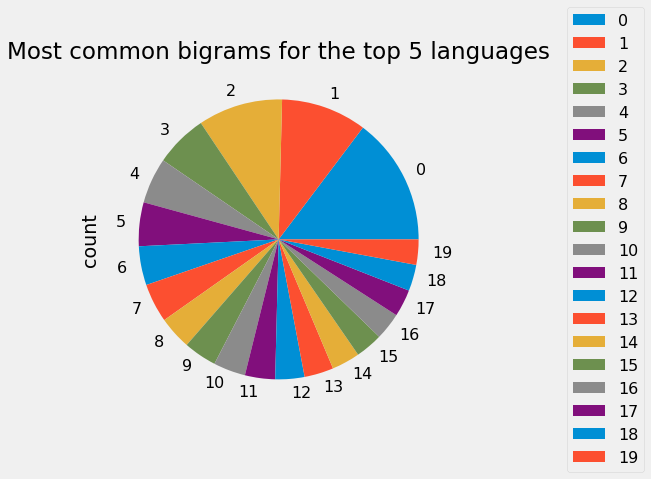

In [ ]:
bigram.plot.pie(y='count', figsize=(6, 6), )
# move legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
# add a title
plt.title('Most common bigrams for the top 5 languages')
# save the plot
plt.savefig('bigram_pie_chart.png')

,count
"(api, version)",131
"(ccxt, prohttpsimgshieldsiobadgeccxtproblackhttpsccxtpro)",54
"(ccxt, certifiedhttpsimgshieldsiobadgeccxtcertifiedgreensvghttpsgithubcomccxtccxtwikicertification)",30
"(__examples__, j)",28
"(certifiedhttpsimgshieldsiobadgeccxtcertifiedgreensvghttpsgithubcomccxtccxtwikicertification, ccxt)",28
"(united, state)",25
"(npm, install)",22
"(npm, run)",21
"(state, configuration)",20
"(public, key)",20


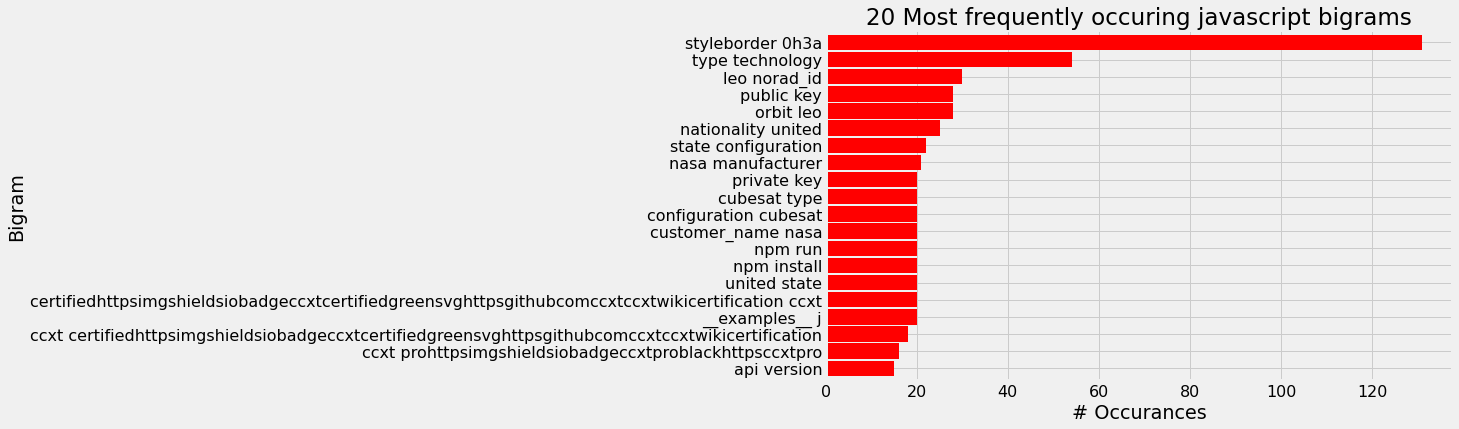

In [ ]:
# what to run in function: 'all', all_words ; 'javascript', javascript_words ; 'python', python_words ; 'jupyter', jupyter_words ;	'C_plus', c_plus_words ; 'html', html_words
bigram = bigram_tool('javascript', javascript_words) # copy code from above and change the programming language
bigram = pd.DataFrame(bigram)
bigram.columns = ['count']
bigram.sort_values(by='count', ascending=False).head(20)

In [ ]:
def turn_pi_chart(bigram, lang):
    # reset bigrams index
    bigram.reset_index(inplace=True)
    bigram.rename(columns={'index': 'bigram'}, inplace=True)
    bigram.set_index('bigram', inplace=True)
    bigram.plot.pie(y='count', figsize=(6, 6), )
    # move legend outside of the plot
    plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
    # add a title
    plt.title(lang + ' bigrams')
    return plt.savefig('bigram_pie_chart.png')

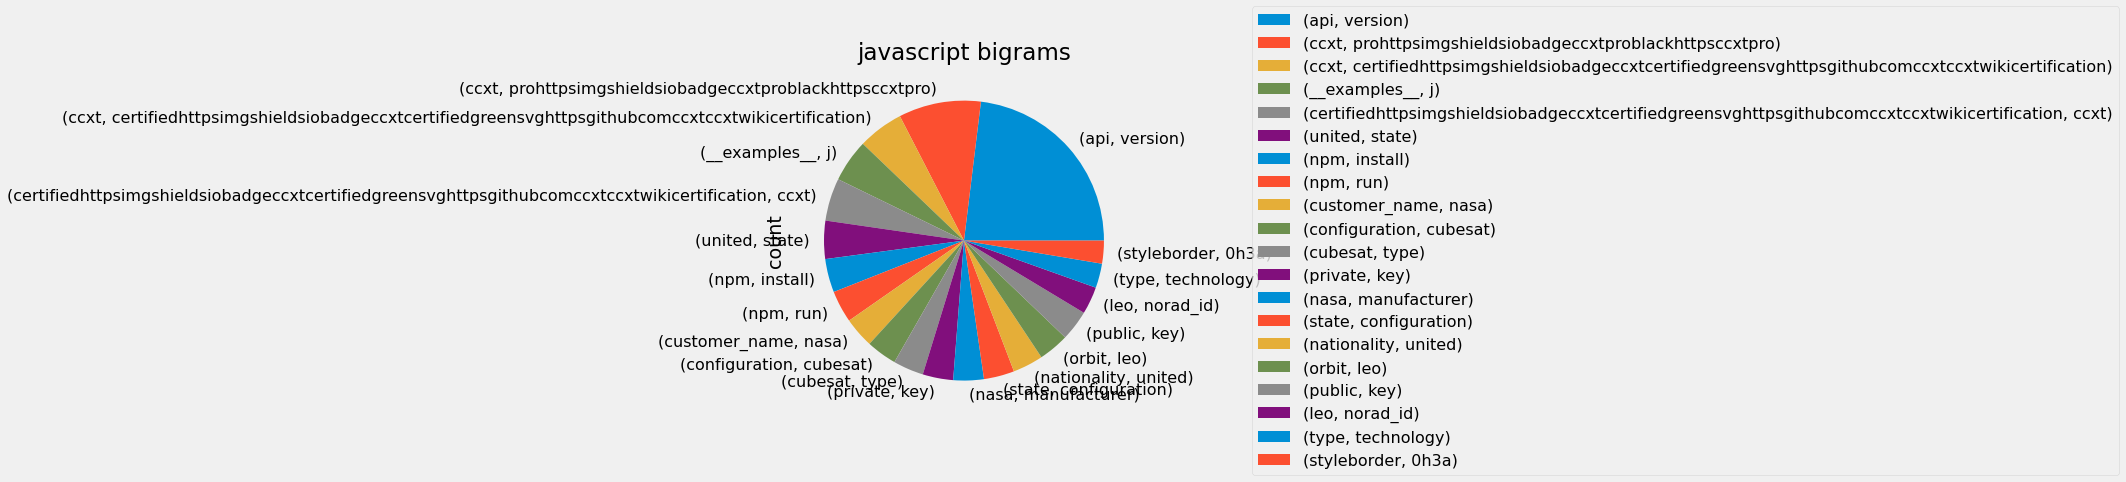

In [ ]:
turn_pi_chart(bigram, 'javascript')

In [255]:
javascript_words = clean(' '.join(data[data.programming_lang == 'JavaScript'].clean_text))
python_words = clean(' '.join(data[data.programming_lang == 'Python'].clean_text))
jupyter_words = clean(' '.join(data[data.programming_lang == 'Jupyter Notebook'].clean_text))
c_plus_words = clean(' '.join(data[data.programming_lang == 'C++'].clean_text))
html_words = clean(' '.join(data[data.programming_lang == 'HTML'].clean_text))

In [256]:
# function to create a bigram model
def bigram_tool(lang, lang_words):
    top_20_ham_bigrams = (pd.Series(nltk.ngrams(lang_words, 2))
                      .value_counts()
                      .head(20))
    top_20_ham_bigrams.sort_values().plot.barh(color= 'red' , width=.9, figsize=(10, 6))


    plt.rc('figure', figsize=(11, 5))
    plt.style.use('fivethirtyeight')
    plt.rc('font', size=16)

    plt.title('20 Most frequently occuring ' + lang + ' bigrams')
    plt.ylabel('Bigram')
    plt.xlabel('# Occurances')

    # make the labels pretty
    ticks, _ = plt.yticks()
    labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
    _ = plt.yticks(ticks, labels)
    
    return top_20_ham_bigrams

,count
"(pip, install)",18
"(open, source)",18
"(yellowhttpsviaplaceholdercom15ffff00text, img)",17
"(ctf, wiki)",16
"(p, aligncenter)",12
"(brain, area)",11
"(computational, neuroscience)",11
"(aligncenter, img)",10
"(bash, git)",10
"(git, clone)",10


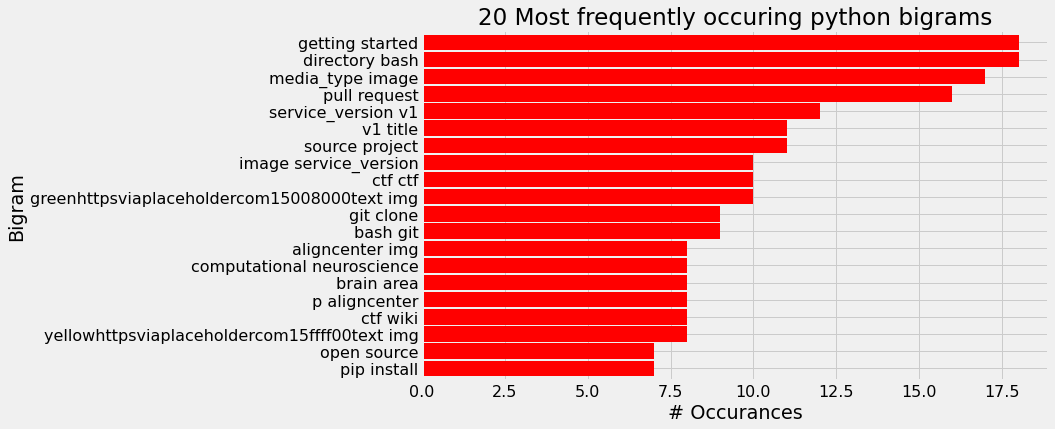

In [259]:
# what to run in function: 'all', all_words ; 'javascript', javascript_words ; 'python', python_words ; 'jupyter', jupyter_words ;	'C_plus', c_plus_words ; 'html', html_words
bigram = bigram_tool('python', python_words) # copy code from above and change the programming language
bigram = pd.DataFrame(bigram)
bigram.columns = ['count']
bigram.sort_values(by='count', ascending=False).head(20)

In [260]:
# function to creates a pi chart from bigram model
def turn_pi_chart(bigram, lang):
    # reset bigrams index
    bigram.reset_index(inplace=True)
    bigram.rename(columns={'index': 'bigram'}, inplace=True)
    bigram.set_index('bigram', inplace=True)
    bigram.plot.pie(y='count', figsize=(6, 6),)
    # move legend outside of the plot
    plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
    # add a title
    plt.title(lang + ' bigrams')
    return plt.savefig('bigram_pie_chart.png')

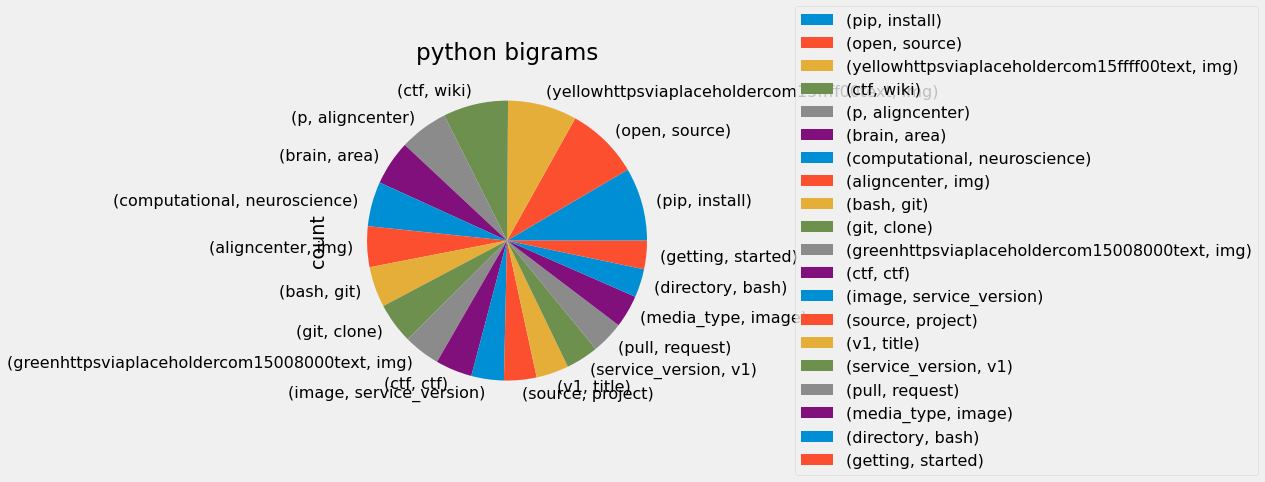

In [261]:
turn_pi_chart(bigram, 'python')